In [1]:
from random import randrange
import random
import heapq
import time
from matplotlib import pyplot as plt 
#%matplotlib notebook
%matplotlib inline
#import mplcursors

In [2]:
def optimal_two_transactions(start_day, stocks):
	if len(stocks) < 2:
		return
	minnum = stocks[start_day]
	maxsum = 0
	for num in stocks[start_day+1:]:
		if num < minnum:
			minnum = num
		elif num-minnum > maxsum:
			maxsum = num-minnum
	return maxsum



def heap_approach(start_day, stocks):
	# For test the performance of a functions we will use only correct input- index not out of range
	#index_buy_day = randrange(0, (len(stocks)-2)) # index of  `buy day`
	#print(index_buy_day)
	try:
		buy_price = stocks[start_day]  # the buy price
		stocks = stocks[start_day + 1:]  # slice from next after `buy day` to the end of array
	except IndexError:
		print("The day index is out of range. Please set another day")

	heapq._heapify_max(stocks)
	best_price = stocks[0]
	return best_price - buy_price

In [3]:
def time_comparison(func_1, func_2, items_in_list, n_iter=100):
	"""
	Each of functions run 100 times for avoid any side effects. So as a result we have minimum value from all func runs.
	"""
	acc_func_1 = float("inf")
	acc_func_2 = float("inf")
	stocks = [random.randrange(0, 500) for items in range(items_in_list)] # set number of elements curent val=2000
	start_day = randrange(0, (len(stocks) - 2)) # For time test I will use only correct input- index not out of range
	for i in range(n_iter):
		t_start_func_1 = time.perf_counter()
		func_1(start_day, stocks)
		t_end_func_1 = time.perf_counter()
		acc_func_1 = min(acc_func_1, t_end_func_1 - t_start_func_1)

		t_start_func_2 = time.perf_counter()
		func_2(start_day, stocks)
		t_end_func2 = time.perf_counter()
		acc_func_2 = min(acc_func_2, t_end_func2 - t_start_func_2 )
    
    #result = acc_func_1, acc_func_2

	return acc_func_1, acc_func_2

In [4]:
heap_approach_time =[]
iter_approach_time =[]
items_in_list = []

for val in list(range(10, 20010, 250)): # Setup range for plot (start, end, step)
    items_in_list.append(val)
    result = time_comparison(heap_approach, optimal_two_transactions, val)
    heap_approach_time.append(result[0])
    iter_approach_time.append(result[1])

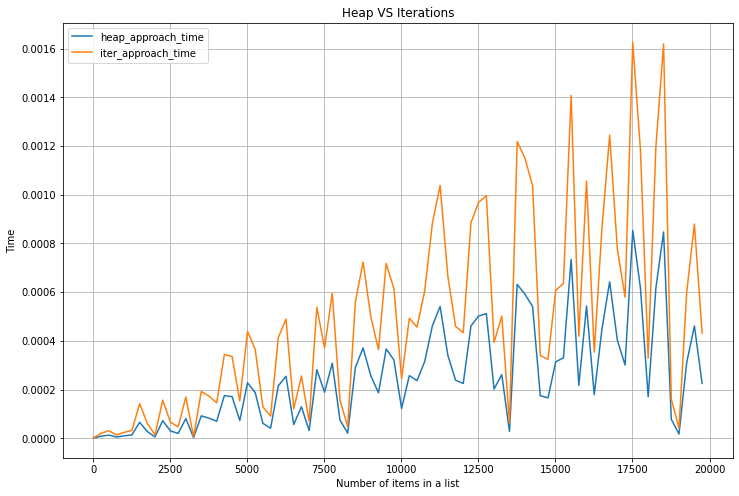

In [5]:
plt.rcParams["figure.figsize"]=12,8
plt.plot(items_in_list, heap_approach_time, label="heap_approach_time")
plt.plot(items_in_list, iter_approach_time, label="iter_approach_time")
plt.legend()
plt.title("Heap VS Iterations");
plt.xlabel("Number of items in a list")
plt.ylabel("Time")

plt.grid(True)